In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as pyplotcolors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import sktensor as skt
from scipy.sparse.linalg import svds
%matplotlib inline

In [2]:
import tools
reload(tools)
from tools import *

In [ ]:
mypals = {
    "beige-purple": {"npal": 5, "start": 2.4, "rot": 0.8, "dark": 0., "light": 0.8, "reverse": 1},
}

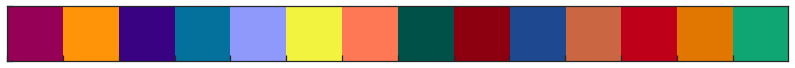

In [3]:
import seaborn as sns
import itertools
# plt.rc('text', usetex=True)
sns.set()
sns.set_style("white")
# sns.set(font_scale=1., 
#         rc={'text.usetex' : True,
#             'font.size' : 32})

sns.set(font_scale=1.8)
sty = sns.set_style("ticks",{"xtick.major.size":0.8,"ytick.major.size":0.8,
                             "xtick.direction": "in","ytick.direction": "in"})
# sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

# plt.rcParams.update({'mathtext.fontset' : 'stix'})
plt.rcParams.update({
    'font.family' : 'serif',
    'text.usetex' : True
    })
#     'legend.fontsize' : 10,
#     'font.size' : 11,
#     'axes.titlesize' : 11,
#     'axes.labelsize' : 11,

# Some more useful parameters at
#
# https://seaborn.pydata.org/tutorial/aesthetics.html
#
# Some colours:
# burgandy : (0.44655508845679537, 0.2211960285890096, 0.30515631911836943)

xkcdcolors = [
"dark magenta",
"tangerine",
"indigo",
"ocean blue",
"periwinkle blue",
"off yellow",
"melon",
"dark blue green",
"crimson",
"cobalt",
"terracotta",
"scarlet",
"pumpkin",
"bluish green",
"slate green",
"twilight blue",
"saffron",
"kiwi green"
]

npal = 14
shift = 0
stride = 1
start = 0
rot = 8.0
gamma = 1.0
dark = 0.1
light = 0.8
# palnamething = sns.cubehelix_palette(npal,start=start,rot=rot,light=light,dark=dark,reverse=True, gamma=gamma)
# palnamething = sns.color_palette("Paired")
# palnamething = sns.color_palette("bright")
palnamething = sns.color_palette(sns.xkcd_palette(xkcdcolors))

sns.set_palette(palnamething, npal)
pal = sns.color_palette(palnamething, npal)
palette = itertools.cycle(pal)
sns.palplot(pal)

for _ in range(shift):
    next(palette)
coldict = {}
for i in range(npal):
    for s in range(1,stride):
        next(palette)
    coldict.update({i:next(palette)})

In [4]:
# PCA params
#
latticemode = True
use_scaling = True # You should always use scaling 
use_xyth = False
use_quadrature = False
quad_dims = [[1,3],[2,4]]
# quad_dims = [[1,2],[3,5],[4,6],[7,8]]
# For polar2, it seems that [3,5] might actually be pairs

In [5]:
# hyperparams
methods = ["random","WD","WA"]
nmethod = len(methods)
n_nbr = 36
nft = n_nbr*2 if use_xyth else n_nbr
run = "e3defect"
method = methods[1]

source = "/home/walterms/mcmd/nn/data/pca/"
fname = ""
if latticemode:
    prestr = source+"lat_nbrs_"+run
    if use_xyth: prestr+="_xyth"
    fname = prestr+"_"+str(n_nbr)+"_"+str(method)
else:
    prestr = source+"nbrs_"+run
    if use_xyth: prestr+="_xyth"
    fname = source+"nbrs_"+run+"_"+str(n_nbr)+"_"+str(method)

In [6]:
import tools
reload(tools)
from tools import *

with open(fname) as f:
    for li, l in enumerate(f):
        pass
nsample = li + 1

wx, wy = 0,1


X = np.empty((nsample,nft))
with open(fname) as fin:
    for i, l in enumerate(fin):
        vals = [float(x) for x in l.split()] #l.split ignores the newline
        X[i] = vals

if use_scaling:
    SS = StandardScaler()
    X = SS.fit_transform(X)

K = 10 # number reduced dimensions
pca = PCA(n_components=K)
Y = pca.fit_transform(X)
# Y_ = pca.inverse_transform(Y)
if use_quadrature:
    Y = quad_features(Y,quad_dims)
    for pair in quad_dims:
        if pair[0] != pair[1]: K-=1

Text(0.05,0.9,u'(d)')

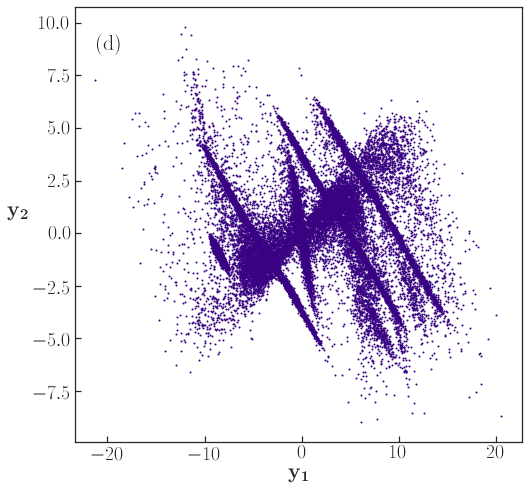

In [7]:
mev = 5
fig = plt.figure(figsize=(8,8))
grid = plt.GridSpec(1,1)
scatt = fig.add_subplot(grid[0])
_ = scatt.scatter(Y[::mev, wx],Y[::mev, wy],s=1,c=coldict[2])
# plt.colorbar(_,ax=ax[0])
scatt.set_xlabel(r'$\mathbf{y_%d}$'%(wx+1))
scatt.set_ylabel(r'$\mathbf{y_%d}$'%((wy+1)),rotation="horizontal",labelpad=15)

scatt.text(0.05,0.9,'(d)',
    transform=scatt.transAxes)

In [24]:
savedir = "/home/walterms/mcmd/imgs/paperimgs/"
savename = savedir+"pca_scatt_"+run+"_"+str(wx)+str(wy)+"_"+method+"_quad"
ans = raw_input("You want to save "+savename+"?")
if ans != "no":
    print "Saving file"
#     f.savefig(savename+".eps",pad_inches=0)
    fig.savefig(savename+".eps",bbox_inches='tight',dpi="figure")

You want to save /home/walterms/mcmd/imgs/paperimgs/pca_scatt_e3defect_01_polar_quad?
Saving file


Text(0.05,0.875,u'(c)')

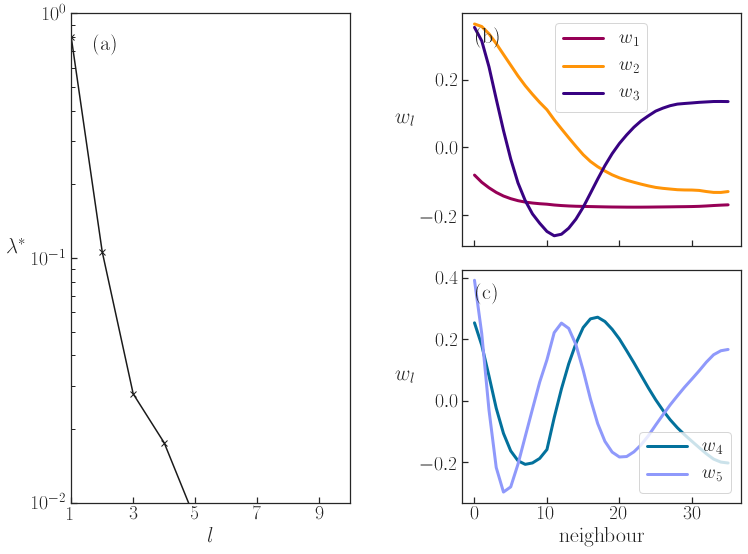

In [8]:
fig = plt.figure(figsize=(12,9))
grid = plt.GridSpec(2,2,hspace=0.1, wspace=0.4,width_ratios=[1,1],height_ratios=[1,1])
lam = fig.add_subplot(grid[:,0])
eigs_0 = fig.add_subplot(grid[0,1])
eigs_1 = fig.add_subplot(grid[1,1])
plt.setp(eigs_0.get_xticklabels(), visible=False)

lam.semilogy(np.arange(1,11),pca.explained_variance_ratio_,'x-',c='k')
lam.set_ylim(0.01,1)
lam.set_xlim(1,10)
_=lam.set_xticks(np.arange(1,11,2))
lam.set_xlabel(r'$l$')
lam.set_ylabel(r'$\lambda^*$',rotation="horizontal",labelpad=15)
lam.text(0.08,0.925,'(a)',
    horizontalalignment='left',
    transform=lam.transAxes)

ws = pca.components_[:5]
# Plot first 3 eigs
for i, w_i in enumerate(ws[:3]):
    eigs_0.plot(w_i,label=r'$w_%d$'%(i+1), color=coldict[i],linewidth=3.)
# eigs_0.legend(loc="upper center",bbox_to_anchor=(-0.15,1.1,1.3,0.1),ncol=4,fontsize="x-small",
#             markerscale=0.5,columnspacing=1.0)
eigs_0.legend()
# eigs_0.set_xlabel(r'neighbour')
eigs_0.set_ylabel(r'$w_l$',rotation="horizontal",labelpad=15)
eigs_0.text(0.05,0.875,'(b)',
    horizontalalignment='left',
    transform=eigs_0.transAxes)

for w_i in ws[3:]:
    i+=1
    eigs_1.plot(w_i,label=r'$w_%d$'%(i+1), color=coldict[i],linewidth=3.)
# eigs_1.legend(loc="upper center",bbox_to_anchor=(-0.15,1.1,1.3,0.1),ncol=4,fontsize="x-small",
#             markerscale=0.5,columnspacing=1.0)
eigs_1.legend(loc="lower right")
eigs_1.set_xlabel(r'neighbour')
eigs_1.set_ylabel(r'$w_l$',rotation="horizontal",labelpad=15)
eigs_1.text(0.05,0.875,'(c)',
    horizontalalignment='left',
    transform=eigs_1.transAxes)



In [215]:
savedir = "/home/walterms/mcmd/imgs/paperimgs/"
savename = savedir+"pca_all_"+run
ans = raw_input("You want to save "+savename+"?")
if ans != "no":
    print "Saving file"
#     f.savefig(savename+".eps",pad_inches=0)
    fig.savefig(savename+".eps",bbox_inches='tight',dpi="figure")

You want to save /home/walterms/mcmd/imgs/paperimgs/pca_all_e3defect?
Saving file


In [ ]:
samp = pca.transform(nbrs[1].reshape(1,-1))
construct = np.dot(samp,pca.components_)[0]
pca_inv = pca.inverse_transform(samp[0])
plt.plot(nbrs[1])
plt.plot(pca_inv)
plt.plot(construct)

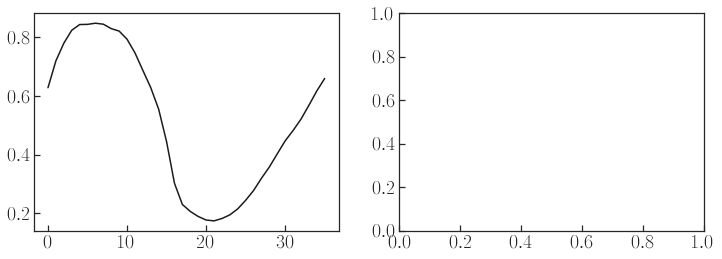

In [34]:
# If you want to do inverse stuff
# For sigdim higher than 2, have to use means of higher dimensions
# It turns out that the transform preserves the 0 means so just use 0
f,ax = plt.subplots(1,2,figsize=(12,4))
test = np.zeros((K))
test[:3] = [-8,-8,-3]
# test = samp.reshape(10)
if use_quadrature:
    print "You can't pca inverse the quad features"
else:
    test_nbrs = pca.inverse_transform(test)
    if use_scaling:
        test_nbrs = SS.inverse_transform(test_nbrs)
    # test_nbrs_trans = S.transform(test_nbrs.reshape(1,-1))
    ax[0].plot(test_nbrs,c="k")
    # ax[0].set_ylim(-1,1)

wi = 1
# ax[1].plot(test_nbrs_trans[0])
# Q = np.array([np.dot(test_nbrs_trans,ww) for ww in ws])
# print Q

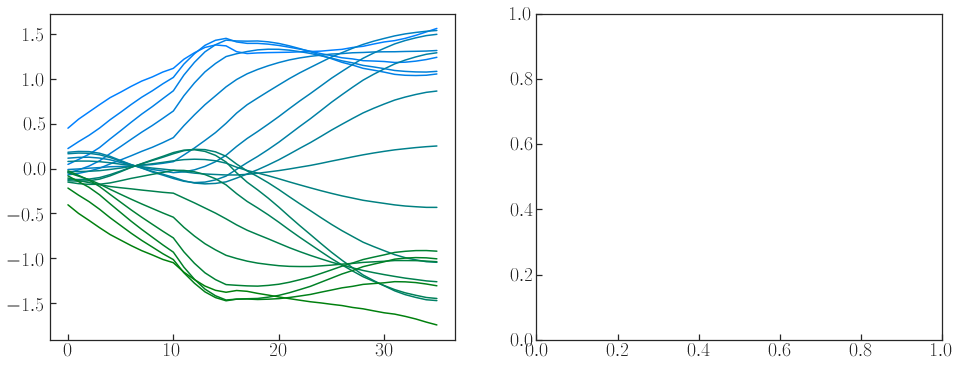

In [27]:
# If you want to do inverse stuff
# For sigdim higher than 2, have to use means of higher dimensions
# It turns out that the transform preserves the 0 means so just use 0
f,ax = plt.subplots(1,2,figsize=(16,6))
dws0 = np.linspace(-15,15,20)
dws1 = np.array([-5.,-3,-1,1,3,4,3,2,1,0,-1,-2,-3,-2,-1,0,1,2,3,4])
dws2 = np.sin(twopi*np.linspace(-1,1,20))*3.5

for i in range(20):
    test = np.zeros((K))
    test[:3] = [dws0[i],dws1[i],dws2[i]]
    col = tuple(np.array([0,0.5,1.0*(1.0-i/20.)]))
    # test = samp.reshape(10)
    if use_quadrature:
        print "You can't pca inverse the quad features"
    else:
        test_nbrs = pca.inverse_transform(test)
        if use_scaling:
            test_nbrs = SS.inverse_transform(test_nbrs)
        # test_nbrs_trans = S.transform(test_nbrs.reshape(1,-1))
        ax[0].plot(test_nbrs,c=col)
        # ax[0].set_ylim(-1,1)

wi = 1
# ax[1].plot(test_nbrs_trans[0])
# Q = np.array([np.dot(test_nbrs_trans,ww) for ww in ws])
# print Q

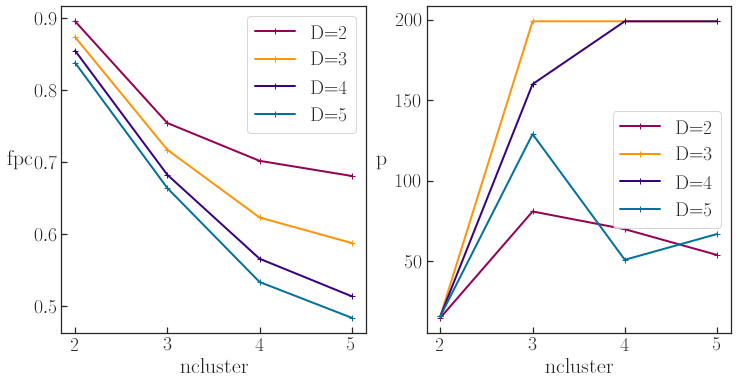

In [72]:
#
# Run fuzzy clustering method
#
NCLUSTERS = np.arange(2,6)
SIGDIMS = np.arange(2,6) # significant dimensions pulled from pca
fpcs = np.zeros(shape=(6,6))
ps = np.zeros(shape=(6,6))
for sigdim in SIGDIMS:
    for ncluster in NCLUSTERS:
        data = Y[:,:sigdim] # Grab first to dims of Y
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            data.T, ncluster, 2, error=0.0001, maxiter=200, init=None)

        # Store fpc values
        fpcs[ncluster,sigdim] = fpc
        ps[ncluster,sigdim] = p
    
#         print sigdim, ncluster, p, fpc
f,ax = plt.subplots(1,2,figsize=(12,6))
for dim in SIGDIMS:
    ax[0].plot(SIGDIMS,fpcs[2:,dim],'+-',label="D=%d"%(dim),c=coldict[dim-SIGDIMS[0]],linewidth=2.0)
    ax[1].plot(SIGDIMS,ps[2:,dim],'+-',label="D=%d"%(dim),c=coldict[dim-SIGDIMS[0]],linewidth=2.0)
     
ax[0].set_ylabel("fpc",rotation="horizontal",labelpad=14)
ax[0].set_xlabel("ncluster")
ax[0].set_xticks(NCLUSTERS)
ax[0].legend()

ax[1].set_ylabel("p",rotation="horizontal",labelpad=14)
ax[1].set_xlabel("ncluster")
ax[1].set_xticks(NCLUSTERS)
ax[1].legend()


In [7]:
# Colouring method
#
use_kmeans = False
use_dims = False # color by first 3 dims
use_1D = True
Dim = 0 # 0 is first dim

In [163]:
sigdim = 4 # for clustering
ncluster = 3

In [9]:
seed = 1235678
b = 0.2 # location of min sat thresh in units of max
b_ = 0.8 # location of max sat thresh

# For dim coloring
maxsats = np.max(Y[:,:3],axis=0) - np.min(Y[:,:3],axis=0)
minsats = np.min(Y[:,:3],axis=0)

base_colors = np.zeros((nsample,3))
if use_kmeans:
    # SELECT A KMEANS COMBO
    data = Y[:,:sigdim] # Grab first to dims of Y
    kmeans = KMeans(n_clusters=ncluster,max_iter=200,tol=0.0001).fit(data)
    cntr = kmeans.cluster_centers_
    lbls = kmeans.labels_
    for ilbl, lbl in enumerate(lbls):
        base_colors[ilbl] = coldict[lbl]

elif use_dims:
    # Use pca dims for coloring RGB
    b = 0.2
    r = 0.8
    P = Y[:,:3]
    P = np.subtract(P,minsats)
    P = np.subtract(P,b*maxsats)
    P = np.divide(P,maxsats*b*r)
    for icol,p in enumerate(P):
        P[icol] = np.where(p>1., 1., p)
        P[icol] = np.where(p<0., 0., p)
    base_colors = P.copy()    
    
elif use_1D:
    maxsat, minsat = maxsats[Dim], minsats[Dim]
    P = Y[:,Dim]
    P = np.subtract(P,minsat)
    P = np.subtract(P,b*maxsat)
    P = np.divide(P,b_*(1-b)*maxsat)
    P = np.where(P>1.,1.,P)
    P = np.where(P<0,0.,P)
    base_colors[:,2] = P.copy()
    base_colors[:,1] = 1-P.copy()    

else:
    # SELECT A FUZZY COMBO
    data = Y[:,:sigdim] # Grab first to dims of Y
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, ncluster, 2, error=0.000001, maxiter=1000, init=None, seed=seed)
    u = np.transpose(u)
    if u.shape[1] == 2:
        u = np.append(np.zeros((nsample,1)),u,axis=1)
    base_colors = u.copy()

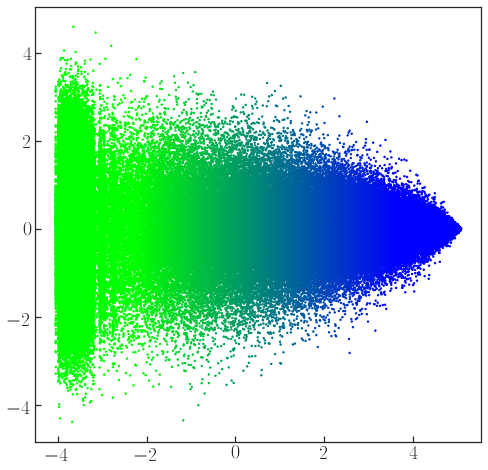

In [32]:
f,ax = plt.subplots(1,1,figsize=(8,8))
_ = ax.scatter(Y[:,0],Y[:,1],s=2,c=base_colors) # for kmeans
if use_kmeans:
    _ = ax.scatter(cntr[:,0],cntr[:,1],marker='x',s=200,c="k",linewidth=4.0)
# _ = ax.set_aspect("equal")

In [10]:
#
# Grab rods from unlbl file
# unlbl files have rod ranges [-0.5,0.5], [-0.5,0.5], [0,1.0]
#
import tools
reload(tools)
from tools import *

edge = 7.00
run = "edge_3_"+"%0.2f"%(edge) # has 278 snaps
fname = "/home/walterms/mcmd/nn/data/unlbl/"+run
globaledge = edge
nrod = 28**2

# edge = 6.324 # xtud edge
# run = "T"
# # fname = "/home/walterms/mcmd/nn/data/unlbl/"+run # has 21 snaps
# fname = "/home/walterms/mcmd/nn/data/templates/"+run # has 2 snaps
# globaledge = edge
# nrod = 28**2

# edge = 15. # 15 for bigbox1, 10 for bigbox2
# run = "bigbox1"
# fname = "/home/walterms/mcmd/nn/data/unlbl/"+run # 60**2 rods for both bigboxes
# globaledge = edge
# nrod = 60**2

# edge = 3.
# run = "minushalf_small"
# fname = "/home/walterms/mcmd/nn/data/defects/"+run # 1001 for smalls
# globaledge = 5.
# nrod = 6**2

nblskip = 1 # -1 produces the last snap
nx = 20
nprobe = nx**2
L = 1.0

if not latticemode:
    nprobe = nrod

probes = gen_probes(nx, edge)

nbl = 0
if nblskip == -1:
    # Count number of blocks
    with open(fname) as fin:
        for i, l in enumerate(fin):
            if l == "\n":
                nbl += 1
    nblskip = nbl - 1

rho = nrod / (edge*edge)
rods = np.empty(shape=(nrod,3))
nbl = 0
irod = 0

fRot = 3

with open(fname) as fin:
    for i, l in enumerate(fin):
        if nbl < nblskip:
            if l == "\n":
                nbl += 1
            continue
        if l == "\n":
            # Done block
            break

        if l.startswith("label"): continue
        rod = [float(x) for x in l.split()]
        x,y = globaledge*rod[0], globaledge*rod[1]
        th = myrotate(twopi*rod[2])

        th_ = fRot*twopi*0.25
        th = (th + th_)%twopi
#         if th > twopi: th-=twopi

        x_ = np.cos(th_)*x - np.sin(th_)*y
        y_ = np.sin(th_)*x + np.cos(th_)*y

        rods[irod] = [x_, y_, th]
        irod += 1

# Transform into higher nbr dimension
features = None
if latticemode:
    features, nbr_coords_full, alphas = get_lat_nbrs(rods,n_nbr,edge,nx,probes,method=method,use_xyth=use_xyth,ret_nbrs=True)
else:
    features = get_nbrs(rods,n_nbr,edge,method=method)
    
if use_scaling:
    features_raw = features.copy()
    features = SS.transform(features) # standardize from training set
    
pca_feats = pca.transform(features) # reduce dimensions with pca
if use_quadrature:
    pca_feats = quad_features(pca_feats,quad_dims)

#
# Probe and colouring
#
probecolors = np.zeros((nprobe,3))

if use_kmeans:
    redu_feats = pca_feats[:,:sigdim]
    colidxs = kmeans.predict(redu_feats)
    for ci,idx in enumerate(colidxs):
        probecolors[ci] = coldict[idx]
    trainset_colors = base_colors.copy()


elif use_dims:
    # Use pca dims for coloring RGB
    P = pca_feats[:,:3]
    P = np.subtract(P,minsats)
    P = np.divide(P,maxsats*0.7)
    for icol,p in enumerate(P):
        P[icol] = np.where(p>1., 1., p)
        P[icol] = np.where(p<0., 0., p)
    probecolors = P.copy()    

elif use_1D:
    maxsat, minsat = maxsats[Dim], minsats[Dim]
    b = 0.3 # location of min sat thresh in units of max
    b_ = 0.7 # location of max sat thresh
    P = pca_feats[:,Dim]
    P = np.subtract(P,minsat)
    P = np.subtract(P,b*maxsat)
    P = np.divide(P,b_*(1-b)*maxsat)
    P = np.where(P>1.,1.,P)
    P = np.where(P<0,0.,P)
    probecolors[:,2] = P.copy()
    probecolors[:,1] = 1-P.copy()

else:
    # Get proximities to centroids
    redu_feats = pca_feats[:,:sigdim]
    dists = np.empty((nprobe,ncluster))
    for ic in range(ncluster):
        dists[:,ic] = dist_from(cntr[ic],redu_feats)

    # Actually, the reciprocals describe how similar
    # a point is to a centroid
    u_probe = normalize(np.reciprocal(dists),axis=1,norm="l1")
    probecolors = u_probe.copy()
    
    if ncluster == 2:
        probecolors = np.append(np.zeros((nprobe,1)),probecolors,axis=1)

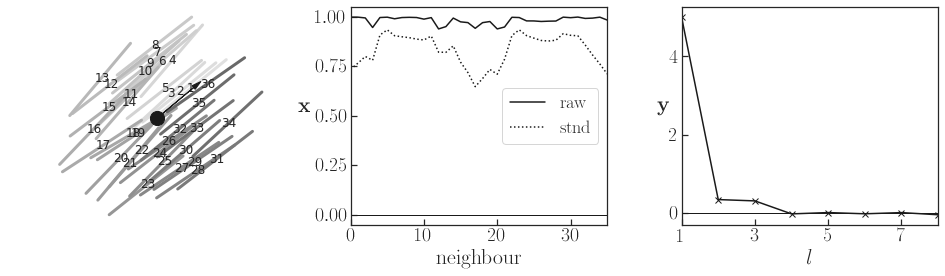

In [38]:
# fig = plt.figure(figsize=(16,4))
fig = plt.figure(figsize=(16,4))
grid = plt.GridSpec(1,3,wspace=0.3,width_ratios=[0.9,1,1])
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
ax2 = fig.add_subplot(grid[2])

ix, iy = 8,11 # x is left-right, y is top-down mod nx (7,8 is tough)
iprob = iy*nx + ix
# 209, defect minusone, nblskip 1 is a perfect X state

test_nbrs = nbr_coords_full[iprob]
for ni, nbr in enumerate(test_nbrs[:,:3]):
#     col = (0,1-float(ni)/n_nbr,float(ni)/n_nbr)
#     col = tuple([cc*(1. - 0.7*irod/float(nrod)) for cc in coldict[0]]) # if cc is light
#     col = tuple([cc + 0.8*(1-cc) * (1 - ni/float(n_nbr)) for cc in coldict[0]]) # if cc is dark
    col = tuple([cc + 0.8*(1-cc) * (1 - ni/float(n_nbr)) for cc in [0.4,0.4,0.4]]) # if cc is dark
    plotrods([nbr],ax0,col=col,lw=3.,add_crosses=False,number=ni+1)

# if using com
px ,py = np.mean(test_nbrs[:,0]), np.mean(test_nbrs[:,1])
# if using prob center
# px, py = probes[iprob,0], probes[iprob,1]

aL = 0.5
alph = alphas[iprob]
hx, hy = aL*cos(alph), aL*sin(alph) 
ax0.scatter(px,py,s=200,marker='o',c='k',zorder=40)
ax0.arrow(px,py,hx,hy, head_width=0.05, head_length=0.1, fc='k', ec='k',zorder=40)

# Set custom ticks
# ax0.set_xticks([])
# ax0.set_yticks([])
ax0.axis('off')
ax0.set_aspect("equal")
# ax0.text(-0.3,0.5,'(b)',
#     horizontalalignment='left',
#     transform=ax0.transAxes)
plt.subplots_adjust(wspace=0.3)

if use_scaling:
    ax1.plot(features_raw[iprob], "-k", label=r'raw')
    ax1.plot(features[iprob],':k',label=r'stnd')
    ax1.legend(fontsize="small")
else:
    ax1.plot(features[irpob],'-k')
plotLine(0,0,nft,0,c='k',ax=ax1,lw=1.0)
ax1.set_xlim(0,nft-1)
ax1.set_ylabel(r'$\mathbf{x}$',rotation="horizontal",labelpad=10)
ax1.set_xlabel("neighbour")


ax2.plot(np.arange(1,K+1),pca_feats[iprob],'x-',c='k')
plotLine(0,0,K,0,c='k',ax=ax2,lw=1.0)
# ax1.set_ylim(0,1)
ax2.set_xlim(1,K)
ax2.set_xlabel(r'$l$')
ax2.set_ylabel(r'$\mathbf{y}$',rotation="horizontal",labelpad=6)
_=ax2.set_xticks(np.arange(1,K+1,2))

In [39]:
savedir = "/home/walterms/mcmd/imgs/paperimgs/"
# savename = savedir+"prob_stats_"+run+"_"+str(nblskip)
savename = savedir+"sample_stats_nem_"+method
ans = raw_input("You want to save "+savename+"?")
if ans != "no":
    print "Saving file"
#     f.savefig(savename+".eps",pad_inches=0)
    fig.savefig(savename+".eps",bbox_inches='tight',dpi="figure")

You want to save /home/walterms/mcmd/imgs/paperimgs/sample_stats_nem_WA?
Saving file


avg for plusone with random mode is -1.33 (standardized). 
avg for ws\_0 analogue is -0.16666.  
SS.mean\_ approx 0.65 for all nbrs. 
SS.var\_ approx 0.22

NameError: name 'mev' is not defined

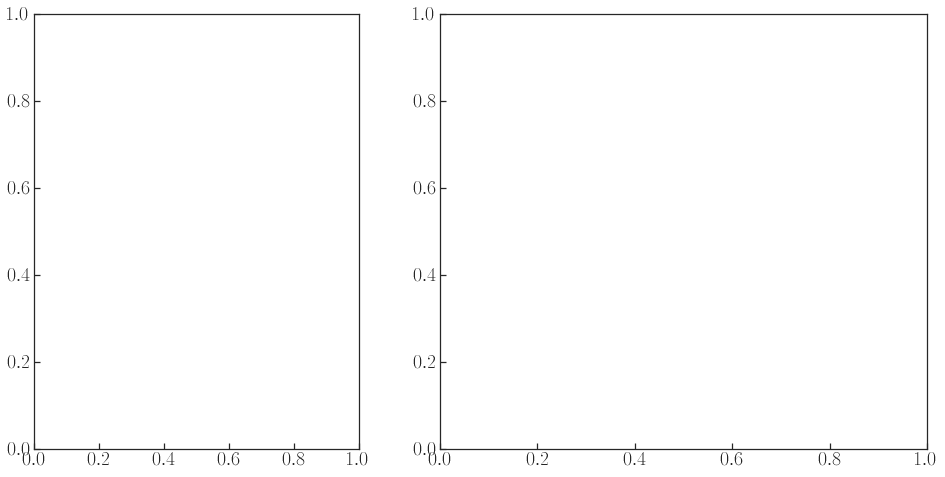

In [24]:
f, ax = plt.subplots(1,2,figsize=(16,8), gridspec_kw={'width_ratios': [1, 1.5]})

d = 1
if use_1D and Dim > 0:
    d = Dim

yx_, yy_ = 0, d
    
_ = ax[0].scatter(Y[::mev,yx_],Y[::mev,d],s=1,c=base_colors[::mev])
_ = ax[0].scatter(pca_feats[:,yx_],pca_feats[:,d],s=20,c=probecolors,edgecolors='k',linewidths=1)
ax[0].set_xlabel(r'$\mathbf{y_%d}$'%(yx_+1))
ax[0].set_ylabel(r'$\mathbf{y_%d}$'%(yy_+1),rotation="horizontal",labelpad=10)

# Plot rods as background
if not latticemode:
    for i,rod in enumerate(rods):
        plotrods([rod],ax[1],col=probecolors[i],lw=3.0) 
else:
    # Probe image
    # Your gen_probe function is set that with the transformation below
    # and how imshow plots that things are correct. You can verify
    # with the scatterplot that is commented
    probeimg = probecolors.copy()
    probeimg = probeimg.reshape((nx,nx,3))
    ax[1].imshow(probeimg,aspect="auto",extent=(-edge/2,edge/2,-edge/2,edge/2))

    # Rods
    for i,rod in enumerate(rods):
        plotrods([rod],ax[1],col="darkslategrey",lw=1.)

radius = 0.5*edge
# ax[1].set_xticks([])
# ax[1].set_yticks([])
boundary = plt.Rectangle((-radius,-radius),edge,edge,color='k',fill=False,zorder=2,linewidth=3);
ax[1].add_artist(boundary);
# ax[1].axis('off');
ax[1].set_xticks([])
ax[1].set_yticks([])
# ax[1].axis([-radius,radius,-radius,radius])
ax[1].set_aspect("equal")

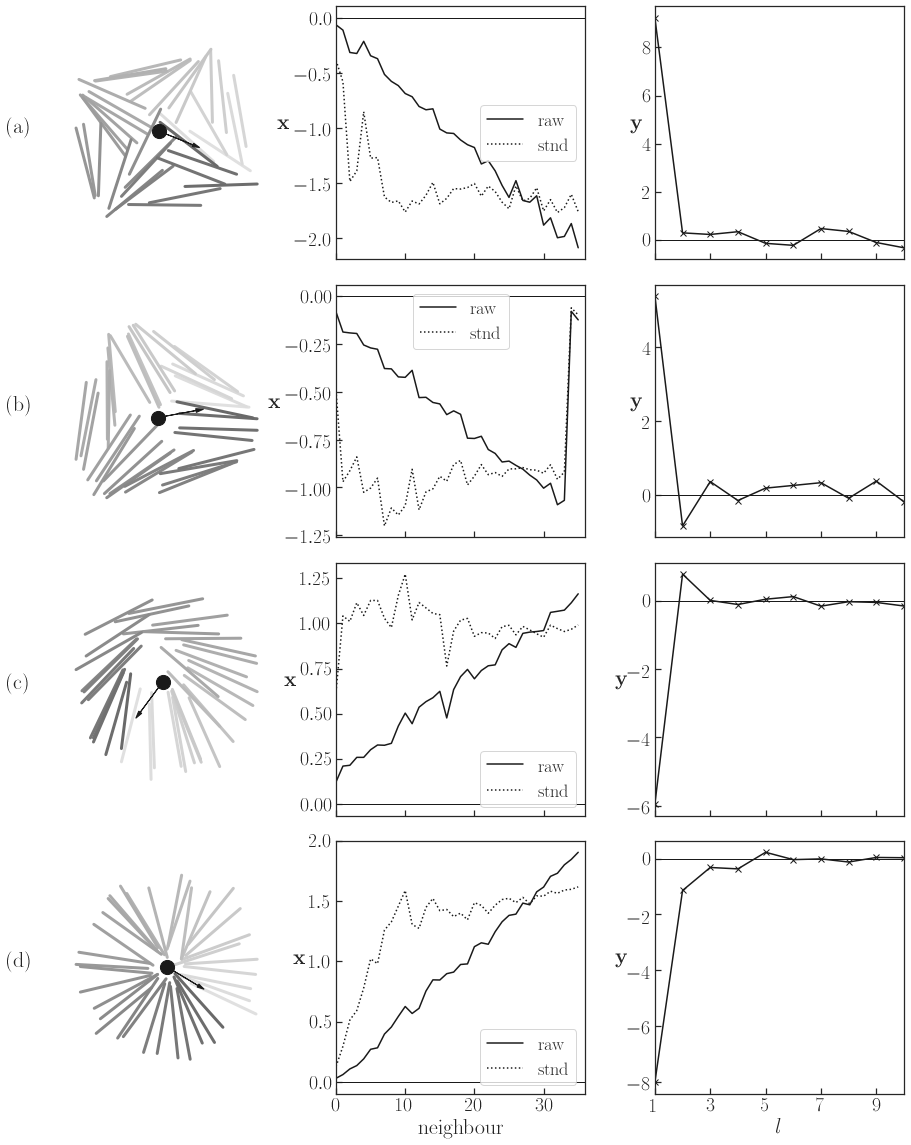

In [41]:
defect_files = ["minusone_small","minushalf_small","plushalf_small","plusone_small"]
abc_texts = ["(a)","(b)","(c)","(d)"]

nblskip = 1
fig = plt.figure(figsize=(15,20))
grid = plt.GridSpec(4,3,wspace=0.3,hspace=0.1,width_ratios=[0.8,1,1])

pca_feat_list = []

for i_def in range(4):
    
    # Get defect info
    ix, iy = 0,0 # x is left-right, y is top-down mod nx (7,8 is tough)
    iprob = iy*nx + ix
    pca_feats, features_raw, features, test_nbrs, alph = get_defect(defect_files[i_def],[probes[200]],nblskip=nblskip)
        
    pca_feat_list.append(pca_feats)
    
    ax0 = fig.add_subplot(grid[i_def,0])
    ax1 = fig.add_subplot(grid[i_def,1])
    ax2 = fig.add_subplot(grid[i_def,2])

    for ni, nbr in enumerate(test_nbrs[:,:3]):
    #     col = (0,1-float(ni)/n_nbr,float(ni)/n_nbr)
    #     col = tuple([cc*(1. - 0.7*irod/float(nrod)) for cc in coldict[0]]) # if cc is light
    #     col = tuple([cc + 0.8*(1-cc) * (1 - ni/float(n_nbr)) for cc in coldict[0]]) # if cc is dark
        col = tuple([cc + 0.8*(1-cc) * (1 - ni/float(n_nbr)) for cc in [0.4,0.4,0.4]]) # if cc is dark
        plotrods([nbr],ax0,col=col,lw=3.,add_crosses=False)

    # if using com
    px ,py = np.mean(test_nbrs[:,0]), np.mean(test_nbrs[:,1])
    # if using prob center
    # px, py = probes[iprob,0], probes[iprob,1]

    aL = 0.5
    hx, hy = aL*cos(alph), aL*sin(alph) 
    ax0.scatter(px,py,s=200,marker='o',c='k',zorder=40)
    ax0.arrow(px,py,hx,hy, head_width=0.05, head_length=0.1, fc='k', ec='k',zorder=40)

    # Set custom ticks
    # ax0.set_xticks([])
    # ax0.set_yticks([])
    ax0.axis('off')
    ax0.set_aspect("equal")
    ax0.text(-0.3,0.5,abc_texts[i_def],
        horizontalalignment='left',
        transform=ax0.transAxes)
    plt.subplots_adjust(wspace=0.3)

    if use_scaling:
        ax1.plot(features_raw, "-k", label=r'raw')
        ax1.plot(features,':k',label=r'stnd')
        ax1.legend(fontsize="small")
    else:
        ax1.plot(features,'-k')
    plotLine(0,0,nft,0,c='k',ax=ax1,lw=1.0)
#     plotLine(35,-2,35,+2,c='k',ax=ax1,lw=1.0)
    ax1.set_xlim(0,nft)
    ax1.set_ylabel(r'$\mathbf{x}$',rotation="horizontal",labelpad=10)
    
    ax2.plot(np.arange(1,K+1),pca_feats[iprob],'x-',c='k')
    plotLine(0,0,K,0,c='k',ax=ax2,lw=1.0)
    ax2.set_xlim(1,K)
    ax2.set_ylabel(r'$\mathbf{y}$',rotation="horizontal",labelpad=6)
    _=ax2.set_xticks(np.arange(1,K+1,2))

    if i_def == 3:
        ax1.set_xlabel("neighbour")
        ax2.set_xlabel(r'$l$')
    else:
        ax1.tick_params(labelbottom=0)
        ax2.tick_params(labelbottom=0)      
    

In [42]:
savedir = "/home/walterms/mcmd/imgs/paperimgs/"
savename = savedir+"defect_feature_curves_"+method
ans = raw_input("You want to save "+savename+"?")
if ans != "no":
    print "Saving file"
#     f.savefig(savename+".eps",pad_inches=0)
    fig.savefig(savename+".eps",bbox_inches='tight',dpi="figure")

You want to save /home/walterms/mcmd/imgs/paperimgs/defect_feature_curves_WD?
Saving file


In [97]:
# Gather defect data
nblskip = 1
nsnap = 800
iprob = 190
pca_feat_arr = np.zeros((4,nsnap,K))
means, stds = np.zeros((4,K)), np.zeros((4,K))

probes = gen_probes(20,3.0)

for i_def in range(4):
    pca_feats, features_raw, features, test_nbrs, alph = \
            get_defect(defect_files[i_def],[probes[iprob]],nblskip=nblskip,nsnap=nsnap)
        
    pca_feat_arr[i_def] = pca_feats
        
    means[i_def] = np.mean(pca_feat_arr[i_def],axis=0)
    stds[i_def] = np.std(pca_feat_arr[i_def],axis=0)
        

# Gather IN data
edges = [7.00,14.00]
iprobes = [210,210] #10,10 looks good for isotrop
nblskip = 1
nsnap = 50
nprobe = 16

IN_pca_feats = np.zeros((2,nsnap*nprobe,K))
IN_means = np.zeros((2,K))
IN_stds = np.zeros((2,K))

for k in [0,1]:
    if use_scaling:
        pca_feats, features_raw, features, test_nbrs, alph = get_IN(edges[k], nblskip=nblskip, 
                                                             iprobe=iprobes[k],nsnap=nsnap,nprobe=nprobe)
    else:
        pca_feats, features, test_nbrs, alph = get_IN(edge[k], nblskip=snap, 
                                               iprobe=iprobes[k], nsnap=len(snaplist))

    IN_pca_feats[k] = pca_feats
        
    IN_means[k] = np.mean(IN_pca_feats[k],axis=0)
    IN_stds[k] = np.std(IN_pca_feats[k],axis=0)

Text(0.05,0.9,u'(b)')

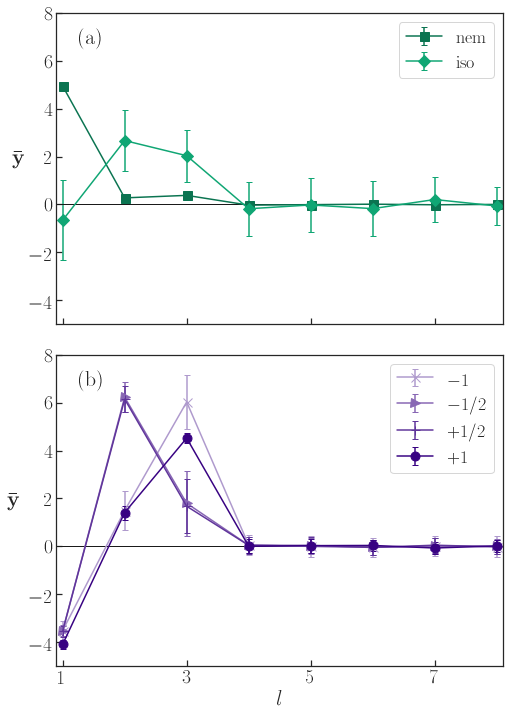

In [98]:
fig,ax = plt.subplots(2,1,figsize=(8,12),gridspec_kw={"hspace": 0.1})
markers=["x",">","+","o"]
labels=[r"$-1$",r"$-1/2$",r"$+1/2$",r"$+1$"]

ylims = [-5,8] # [-5,6] for rand, [-10,12] for WD, [-5,8] for WA 

# Plot IN data
IN_markers=["s","D"]
IN_labels=[r'nem',r'iso']
c = np.array(coldict[13])
IN_cols = [c*0.7, c]

for k in [0,1]:
    ax[0].errorbar(np.arange(1,K+1),IN_means[k],yerr=IN_stds[k],marker=IN_markers[k],
                fmt='-',c=IN_cols[k],markersize=9,label=IN_labels[k],capsize=3)

plotLine(0,0,K,0,c='k',ax=ax[0],lw=1.0)
ax[0].set_xlim(0.9,K+0.1)
ax[0].set_ylim(ylims[0],ylims[1])
ax[0].set_ylabel(r'$\mathbf{\bar{y}}$',rotation="horizontal",labelpad=10)
_=ax[0].set_xticks(np.arange(1,K+1,2))
ax[0].tick_params(labelbottom="off")
ax[0].legend(fontsize="small")
ax[0].text(0.05,0.9,"(a)",
    horizontalalignment='left',
    transform=ax[0].transAxes)

# Plot defect data
for i_def in range(4):
    col = tuple([cc + 0.8*(1-cc) * (0.75 - i_def/4.) for cc in coldict[2]])
    ax[1].errorbar(np.arange(1,K+1),means[i_def],yerr=stds[i_def],fmt='-',capsize=3,
                marker=markers[i_def],mfc=None,c=col,markersize=9,label=labels[i_def])

plotLine(-0.1,0,K+0.1,0,c='k',ax=ax[1],lw=1.0)
ax[1].set_xlim(0.9,K+0.1)
ax[1].set_ylim(ylims[0],ylims[1])
ax[1].set_ylabel(r'$\mathbf{\bar{y}}$',rotation="horizontal",labelpad=15)
_=ax[1].set_xticks(np.arange(1,K+1,2))
# ax[1].set_xlabel(r'$l$')
def_legend = ax[1].legend(fontsize="small")
# def_legend = ax.legend(fontsize="small",loc="upper left",bbox_to_anchor=[1.,1.02])
ax[1].set_xlabel(r'$l$')
ax[1].text(0.05,0.9,"(b)",
    horizontalalignment='left',
    transform=ax[1].transAxes)




In [99]:
savedir = "/home/walterms/mcmd/imgs/paperimgs/"
savename = savedir+"response_curves_"+method
ans = raw_input("You want to save "+savename+"?")
if ans != "no":
    print "Saving file"
#     f.savefig(savename+".eps",pad_inches=0)
    fig.savefig(savename+".eps",bbox_inches='tight',dpi="figure")

You want to save /home/walterms/mcmd/imgs/paperimgs/response_curves_WA?
Saving file


In [14]:
import tools
reload(tools)
from tools import *

defect_files = ["minusone_small","minushalf_small","plushalf_small","plusone_small"]

def get_defect(defname, probes, nblskip=0, nsnap=1):
    edge = 3.
    fname = "/home/walterms/mcmd/nn/data/defects/"+defname
    globaledge = 5.
    nrod = 6**2
    
    L = 1.0
    nx = 20

    rods = np.empty(shape=(nrod,3))
    nbl = 0
    irod = 0

    pca_feats = np.zeros((nsnap,K))
    isnap = 0
    with open(fname) as fin:
        for i, l in enumerate(fin):
            if nbl < nblskip:
                if l == "\n":
                    nbl += 1
                continue
            if l == "\n":
                # Done block
                # Transform into higher nbr dimension
                features, nbr_coords_full, alphas = get_lat_nbrs(rods,n_nbr,edge,nx,probes,method=method,
                        use_xyth=use_xyth,ret_nbrs=True)
                if use_scaling:
                    features_raw = features.copy()
                    features = SS.transform(features) # standardize from training set

                pca_feats_ = pca.transform(features) # reduce dimensions with pca
                if use_quadrature:
                    pca_feats_ = quad_features(pca_feats_,quad_dims)
                pca_feats[isnap] = pca_feats_
                isnap+=1
                rods = np.empty(shape=(nrod,3))
                irod = 0
                nbl += 1
                if nbl == nsnap+nblskip: break
                else: continue

            if l.startswith("label"): continue
            rod = [float(x) for x in l.split()]
            rods[irod] = [globaledge*rod[0], globaledge*rod[1], myrotate(twopi*rod[2])]
            irod += 1
        
    if use_scaling:
        return pca_feats, features_raw[0], features[0], nbr_coords_full[0], alphas[0]
    else:
        return pca_feats, features, nbr_coords_full, alphas

In [9]:
import tools
reload(tools)
from tools import *

def get_int_probes(probes):
    nx = int(np.sqrt(probes.shape[0]))
    # Grab 16 probes from middle
    r3 = 2 # root / 2 of patch
    ips = []
    for ix in range(nx//2 - r3,nx//2 + r3):
        for iy in range(nx//2 - r3, nx//2 + r3):
            ips.append(nx*iy + ix)
    return probes[np.asarray(ips),:]
    
    

def get_IN(edge,nblskip,nsnap=1,nprobe=1,iprobe=None):
    # nsnap is how many to grab
    run = "edge_3_"+"%0.2f"%(edge)
    fname = "/home/walterms/mcmd/nn/data/unlbl/"+run
    globaledge = edge
    nrod = 28**2
    L = 1.0
    nx = 20
    probes = gen_probes(nx, edge)
    # Grab nprobes from the interior
    
    if iprobe:
        probes = probes[iprobe].reshape(1,2)
    else:
        probes = get_int_probes(probes)
    nbl = 0

    if nblskip == -1:
        # Count number of blocks
        with open(fname) as fin:
            for i, l in enumerate(fin):
                if l == "\n":
                    nbl += 1
        nblskip = nbl - 1

    rho = nrod / (edge*edge)
#     print "rho ",rho
    rods = np.empty(shape=(nrod,3))
    nbl = 0
    irod = 0

    pca_feats = np.zeros((nsnap*nprobe,K))
    isnap = 0
    with open(fname) as fin:
        for i, l in enumerate(fin):
            if nbl < nblskip:
                if l == "\n":
                    nbl += 1
                continue
            if l == "\n":
                # Done block
                # Transform into higher nbr dimension
                features, nbr_coords_full, alphas = get_lat_nbrs(rods,n_nbr,edge,nx,probes,method=method,
                        use_xyth=use_xyth,ret_nbrs=True)
                if use_scaling:
                    features_raw = features.copy()
                    features = SS.transform(features) # standardize from training set

                pca_feats_ = pca.transform(features) # reduce dimensions with pca
                if use_quadrature:
                    pca_feats_ = quad_features(pca_feats_,quad_dims)
                pca_feats[isnap*nprobe:nprobe*(isnap+1)] = pca_feats_
                isnap+=1
                rods = np.empty(shape=(nrod,3))
                irod = 0
                nbl += 1
                if nbl == nsnap+nblskip: break
                else: continue

            if l.startswith("label"): continue
            rod = [float(x) for x in l.split()]
            rods[irod] = [globaledge*rod[0], globaledge*rod[1], myrotate(twopi*rod[2])]
            irod += 1

    if use_scaling:
        return pca_feats, features_raw, features, nbr_coords_full, alphas
    else:
        return pca_feats, features, nbr_coords_full, alphas